In [2]:
from google.colab import drive
drive.mount('/content/gdrive')
%cd /content/gdrive/MyDrive

Mounted at /content/gdrive
/content/gdrive/MyDrive


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [4]:
df=pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/ckd.csv')

In [5]:
df

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
395,395,55.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,47,6700,4.9,no,no,no,good,no,no,notckd
396,396,42.0,70.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,54,7800,6.2,no,no,no,good,no,no,notckd
397,397,12.0,80.0,1.020,0.0,0.0,normal,normal,notpresent,notpresent,...,49,6600,5.4,no,no,no,good,no,no,notckd
398,398,17.0,60.0,1.025,0.0,0.0,normal,normal,notpresent,notpresent,...,51,7200,5.9,no,no,no,good,no,no,notckd


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
for col in df.columns:
    print(f"{col} has {df[col].unique()} values\n")

id has [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244

In [8]:
df.classification.unique()

array(['ckd', 'ckd\t', 'notckd'], dtype=object)

In [9]:
df.classification=df.classification.replace("ckd\t","ckd")
df.classification.unique()

array(['ckd', 'notckd'], dtype=object)

In [10]:
df=df.drop("id",axis=1)
df.shape

(400, 25)

In [11]:
df['classification']=df['classification'].replace(['ckd',"notckd"],[1,0])
df.head(5)

,age,bp,sg,al,su,rbc,pc,pcc,ba,bgr,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,121.0,...,44,7800,5.2,yes,yes,no,good,no,no,1
1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,NaN,...,38,6000,NaN,no,no,no,good,no,no,1
2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,423.0,...,31,7500,NaN,no,yes,no,poor,no,yes,1
3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,117.0,...,32,6700,3.9,yes,no,no,poor,yes,yes,1
4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,106.0,...,35,7300,4.6,no,no,no,good,no,no,1


In [12]:
df.columns = ['age', 'blood_pressure', 'specific_gravity', 'albumin', 'sugar', 'red_blood_cells', 'pus_cell',
              'pus_cell_clumps', 'bacteria', 'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
              'potassium', 'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count', 'red_blood_cell_count',
              'hypertension', 'diabetes_mellitus', 'coronary_artery_disease', 'appetite', 'peda_edema',
              'aanemia', 'class']
              

In [13]:
df['packed_cell_volume'] = pd.to_numeric(df['packed_cell_volume'], errors='coerce')
df['white_blood_cell_count'] = pd.to_numeric(df['white_blood_cell_count'], errors='coerce')
df['red_blood_cell_count'] = pd.to_numeric(df['red_blood_cell_count'], errors='coerce')

In [14]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
num_cols = [col for col in df.columns if df[col].dtype != 'object']

In [15]:
for col in cat_cols:
    print(f"{col} has {df[col].unique()} values\n")

red_blood_cells has [nan 'normal' 'abnormal'] values

pus_cell has ['normal' 'abnormal' nan] values

pus_cell_clumps has ['notpresent' 'present' nan] values

bacteria has ['notpresent' 'present' nan] values

hypertension has ['yes' 'no' nan] values

diabetes_mellitus has ['yes' 'no' ' yes' '\tno' '\tyes' nan] values

coronary_artery_disease has ['no' 'yes' '\tno' nan] values

appetite has ['good' 'poor' nan] values

peda_edema has ['no' 'yes' nan] values

aanemia has ['no' 'yes' nan] values



In [16]:
df['diabetes_mellitus'].replace(to_replace = {'\tno':'no','\tyes':'yes',' yes':'yes'},inplace=True)

df['coronary_artery_disease'] = df['coronary_artery_disease'].replace(to_replace = '\tno', value='no')


In [17]:
df.isna().sum().sort_values(ascending = False)

red_blood_cells            152
red_blood_cell_count       131
white_blood_cell_count     106
potassium                   88
sodium                      87
packed_cell_volume          71
pus_cell                    65
haemoglobin                 52
sugar                       49
specific_gravity            47
albumin                     46
blood_glucose_random        44
blood_urea                  19
serum_creatinine            17
blood_pressure              12
age                          9
bacteria                     4
pus_cell_clumps              4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
class                        0
dtype: int64

In [18]:
df[num_cols].isnull().sum()

age                         9
blood_pressure             12
specific_gravity           47
albumin                    46
sugar                      49
blood_glucose_random       44
blood_urea                 19
serum_creatinine           17
sodium                     87
potassium                  88
haemoglobin                52
packed_cell_volume         71
white_blood_cell_count    106
red_blood_cell_count      131
class                       0
dtype: int64

In [19]:
df[cat_cols].isnull().sum()

red_blood_cells            152
pus_cell                    65
pus_cell_clumps              4
bacteria                     4
hypertension                 2
diabetes_mellitus            2
coronary_artery_disease      2
appetite                     1
peda_edema                   1
aanemia                      1
dtype: int64

In [20]:
def random_value_imputation(feature):
    random_sample = df[feature].dropna().sample(df[feature].isna().sum())
    print(random_sample)
    random_sample.index = df[df[feature].isnull()].index
    print(random_sample.index)
    df.loc[df[feature].isnull(), feature] = random_sample

for col in num_cols:
    random_value_imputation(col)

random_value_imputation('red_blood_cells')
random_value_imputation('pus_cell')    

328    28.0
280    47.0
44     54.0
214    68.0
380    59.0
204    65.0
341    63.0
325    58.0
111    65.0
Name: age, dtype: float64
Int64Index([30, 73, 112, 116, 117, 169, 191, 203, 268], dtype='int64')
165     80.0
183     70.0
18     100.0
17      80.0
296     70.0
263     80.0
292     80.0
160     60.0
59     100.0
364     80.0
245    100.0
140     70.0
Name: blood_pressure, dtype: float64
Int64Index([7, 75, 132, 138, 161, 164, 185, 187, 188, 215, 293, 316], dtype='int64')
253    1.025
187    1.010
335    1.020
211    1.015
235    1.010
327    1.025
55     1.005
138    1.010
194    1.010
265    1.020
250    1.025
7      1.015
60     1.020
70     1.015
398    1.025
186    1.020
226    1.015
308    1.025
311    1.025
206    1.010
22     1.025
181    1.025
307    1.020
32     1.010
185    1.020
246    1.015
178    1.020
370    1.020
190    1.010
77     1.010
278    1.020
71     1.010
324    1.020
1      1.020
263    1.020
341    1.025
94     1.010
348    1.020
136    1.020
72     1.0

In [21]:
df[num_cols].isnull().sum()

age                       0
blood_pressure            0
specific_gravity          0
albumin                   0
sugar                     0
blood_glucose_random      0
blood_urea                0
serum_creatinine          0
sodium                    0
potassium                 0
haemoglobin               0
packed_cell_volume        0
white_blood_cell_count    0
red_blood_cell_count      0
class                     0
dtype: int64

In [22]:
def impute_mode(feature):
    mode = df[feature].mode()[0]
    df[feature] = df[feature].fillna(mode)




for col in cat_cols:
    
    impute_mode(col)    

In [23]:
df[cat_cols].isnull().sum()

red_blood_cells            0
pus_cell                   0
pus_cell_clumps            0
bacteria                   0
hypertension               0
diabetes_mellitus          0
coronary_artery_disease    0
appetite                   0
peda_edema                 0
aanemia                    0
dtype: int64

In [24]:


for col in cat_cols:
    print(f"{col} has {df[col].nunique()} categories\n")



red_blood_cells has 2 categories

pus_cell has 2 categories

pus_cell_clumps has 2 categories

bacteria has 2 categories

hypertension has 2 categories

diabetes_mellitus has 2 categories

coronary_artery_disease has 2 categories

appetite has 2 categories

peda_edema has 2 categories

aanemia has 2 categories



In [25]:


from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
print(le)
for col in cat_cols:
    df[col] = le.fit_transform(df[col])
    print(df[col])



LabelEncoder()
0      1
1      1
2      1
3      1
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: red_blood_cells, Length: 400, dtype: int64
0      1
1      1
2      1
3      0
4      1
      ..
395    1
396    1
397    1
398    1
399    1
Name: pus_cell, Length: 400, dtype: int64
0      0
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: pus_cell_clumps, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: bacteria, Length: 400, dtype: int64
0      1
1      0
2      0
3      1
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: hypertension, Length: 400, dtype: int64
0      1
1      0
2      1
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: diabetes_mellitus, Length: 400, dtype: int64
0      0
1      0
2      0
3      0
4      0
      ..
395    0
396    0
397    0
398    0
399    0
Name: coronar

In [26]:


df.head()



,age,blood_pressure,specific_gravity,albumin,sugar,red_blood_cells,pus_cell,pus_cell_clumps,bacteria,blood_glucose_random,...,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,coronary_artery_disease,appetite,peda_edema,aanemia,class
0,48.0,80.0,1.020,1.0,0.0,1,1,0,0,121.0,...,44.0,7800.0,5.2,1,1,0,0,0,0,1
1,7.0,50.0,1.020,4.0,0.0,1,1,0,0,117.0,...,38.0,6000.0,4.8,0,0,0,0,0,0,1
2,62.0,80.0,1.010,2.0,3.0,1,1,0,0,423.0,...,31.0,7500.0,6.1,0,1,0,1,0,1,1
3,48.0,70.0,1.005,4.0,0.0,1,0,1,0,117.0,...,32.0,6700.0,3.9,1,0,0,1,1,1,1
4,51.0,80.0,1.010,2.0,0.0,1,1,0,0,106.0,...,35.0,7300.0,4.6,0,0,0,0,0,0,1


In [27]:
ind_col = [col for col in df.columns if col != 'class']
dep_col = 'class'

X = df[ind_col]
Y = df[dep_col]

In [28]:
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression
num_folds=5
logreg=LogisticRegression()
kfold = KFold(n_splits=num_folds, shuffle=True)
score=cross_val_score(logreg,X,Y,cv=kfold)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.9125 0.9    0.875  0.8875 0.8875]
Average Cross Validation score :0.8925000000000001


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _che

In [90]:
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical




# Define the model architecture
model = Sequential()
model.add(Dense(2, input_dim=24))


model.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['acc'])

model.summary()  

Model: "sequential_136"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_298 (Dense)           (None, 2)                 50        
                                                                 
Total params: 50
Trainable params: 50
Non-trainable params: 0
_________________________________________________________________


------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 6.9956 - acc: 0.4281 - val_loss: 6.7592 - val_acc: 0.4000
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 6.1709 - acc: 0.4406 - val_loss: 6.0469 - val_acc: 0.4000
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 5.3406 - acc: 0.4406 - val_loss: 5.2456 - val_acc: 0.4250
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 4.7123 - acc: 0.4437 - val_loss: 5.0295 - val_acc: 0.4375
Epoch 5/5
3/3 [==============================] - 0s 3ms/step - loss: 3.9902 - acc: 0.5250
Score for fold 1: loss of 3.9901747703552246; acc of 52.49999761581421%
------------------------------------------------------------------------
Training for fold 2 ...
Epoch 1/5
32/32 [==============================] - 0s 4ms/step - loss: 3.3651 - acc: 0.5562 - val_loss: 2.5296 - val_acc: 0.6125

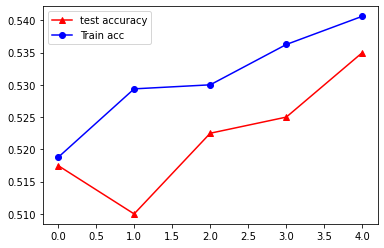

In [91]:
from sklearn.metrics import log_loss


loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 
for train, test in kfold.split(X , Y): 
  X_train, X_test = X.iloc[train], X.iloc[test]
  Y_train, Y_test = Y.iloc[train], Y.iloc[test]
  Y_train = to_categorical(Y_train)
  Y_test = to_categorical(Y_test)
  #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model.fit(X_train, Y_train ,
              validation_data=(X_test , Y_test) ,       
              batch_size=10,
              epochs=5
              )
  acc= history.history['acc']
  loss=history.history['loss']
  val_acc=history.history['val_acc']
  val_loss=history.history['val_loss']
  # Generate generalization metrics
  #scores2 = model.evaluate(X_train,Y_train )
  scores = model.evaluate(X_test,Y_test )
  print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  #acc_test_per_fold.append(scores[1] * 100)
  #loss_test_per_fold.append(scores[0])

  #acc2_per_fold.append(scores2[1] * 100)
  #loss2_per_fold.append(scores2[0])
  loss_test_per_fold.append(val_loss)
  acc_test_per_fold.append(val_acc)
  acc_per_fold.append(acc)
  loss_per_fold.append(loss)
  # Increase fold number
  fold_no = fold_no + 1

acc_test_per_fold= np.array(acc_test_per_fold)
acc_test=np.sum(acc_test_per_fold , axis=0)/5
plt.plot(acc_test, 'r^-', label='test accuracy')
plt.grid()
plt.legend()

acc_per_fold= np.array(acc_per_fold)
acc=np.sum(acc_per_fold , axis=0)/5
plt.plot(acc, 'bo-', label='Train acc')
plt.grid()
plt.legend()  

Model: "sequential_139"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_303 (Dense)           (None, 40)                1000      
                                                                 
 dense_304 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 3.0016 - acc: 0.5688 - val_loss: 0.7725 - val_acc: 0.7375
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7452 - acc: 0.7781 - val_loss: 0.4640 - val_acc: 0.8000
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 0.5547 - acc: 0.8531

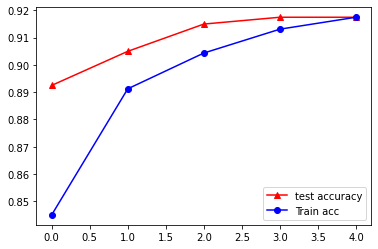

In [94]:
loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]
model2 = Sequential()
model2.add(Dense(40, input_dim=len(X.columns)))
model2.add(Dense(2 ))



model2.compile(optimizer='adam',
            loss='binary_crossentropy',
            metrics=['acc'])
model2.summary()  
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 
for train, test in kfold.split(X , Y): 
  X_train, X_test = X.iloc[train], X.iloc[test]
  Y_train, Y_test = Y.iloc[train], Y.iloc[test]
  Y_train = to_categorical(Y_train)
  Y_test = to_categorical(Y_test)
  #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')

  # Fit data to model
  history = model2.fit(X_train, Y_train ,
              validation_data=(X_test , Y_test) ,       
              batch_size=10,
              epochs=5
              )
  acc= history.history['acc']
  loss=history.history['loss']
  val_acc=history.history['val_acc']
  val_loss=history.history['val_loss']

  loss_test_per_fold.append(val_loss)
  acc_test_per_fold.append(val_acc)
  acc_per_fold.append(acc)
  loss_per_fold.append(loss)


  fold_no = fold_no + 1

acc_test_per_fold= np.array(acc_test_per_fold)
acc_test=np.sum(acc_test_per_fold , axis=0)/5
plt.plot(acc_test, 'r^-', label='test accuracy')
plt.grid()
plt.legend()

acc_per_fold= np.array(acc_per_fold)
acc=np.sum(acc_per_fold , axis=0)/5
plt.plot(acc, 'bo-', label='Train acc')
plt.grid()
plt.legend()  


Model: "sequential_140"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_305 (Dense)           (None, 2)                 50        
                                                                 
 dense_306 (Dense)           (None, 2)                 6         
                                                                 
Total params: 56
Trainable params: 56
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 2.3232 - acc: 0.5344 - val_loss: 1.5974 - val_acc: 0.5000
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.4077 - acc: 0.5656 - val_loss: 1.0531 - val_acc: 0.5875
Epoch 3/5
32/32 [==============================] - 0s 2ms/step - loss: 1.1236 - acc: 0.6031 - val

Score for fold 5: loss of 0.8362027406692505; acc of 63.749998807907104%
Model: "sequential_141"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_307 (Dense)           (None, 4)                 100       
                                                                 
 dense_308 (Dense)           (None, 2)                 10        
                                                                 
Total params: 110
Trainable params: 110
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
32/32 [==============================] - 1s 22ms/step - loss: 5.0083 - acc: 0.3844 - val_loss: 5.5333 - val_acc: 0.3500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 4.4990 - acc: 0.4656 - val_loss: 5.1028 - val_acc: 0.4000
Epoch 3/5
32/32 [====

Score for fold 10: loss of 0.6501026153564453; acc of 55.000001192092896%
Model: "sequential_142"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_309 (Dense)           (None, 8)                 200       
                                                                 
 dense_310 (Dense)           (None, 2)                 18        
                                                                 
Total params: 218
Trainable params: 218
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 11 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 5.6111 - acc: 0.3812 - val_loss: 5.3697 - val_acc: 0.3500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 5.1997 - acc: 0.3812 - val_loss: 5.1898 - val_acc: 0.3500
Epoch 3/5
32/32 [===

Score for fold 15: loss of 0.5444830656051636; acc of 56.25%


Model: "sequential_143"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_311 (Dense)           (None, 16)                400       
                                                                 
 dense_312 (Dense)           (None, 2)                 34        
                                                                 
Total params: 434
Trainable params: 434
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 16 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 1.7752 - acc: 0.5625 - val_loss: 0.9925 - val_acc: 0.4750
Epoch 2/5
32/32 [==============================] - 0s 2ms/step - loss: 1.0271 - acc: 0.5031 - val_loss: 0.7491 - val_acc: 0.5250
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.8380 - acc: 0.5469 - 

Score for fold 20: loss of 0.6960684061050415; acc of 62.5%
Model: "sequential_144"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_313 (Dense)           (None, 32)                800       
                                                                 
 dense_314 (Dense)           (None, 2)                 66        
                                                                 
Total params: 866
Trainable params: 866
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 21 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 1.2263 - acc: 0.6281 - val_loss: 0.7310 - val_acc: 0.9625
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7889 - acc: 0.8500 - val_loss: 0.5115 - val_acc: 0.9625
Epoch 3/5
32/32 [=================

Model: "sequential_145"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_315 (Dense)           (None, 64)                1600      
                                                                 
 dense_316 (Dense)           (None, 2)                 130       
                                                                 
Total params: 1,730
Trainable params: 1,730
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 26 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 2.7574 - acc: 0.6000 - val_loss: 0.4024 - val_acc: 0.9500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3840 - acc: 0.9219 - val_loss: 0.3320 - val_acc: 0.9625
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2961 - acc: 0.931

Score for fold 30: loss of 0.7439238429069519; acc of 63.749998807907104%
Model: "sequential_146"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_317 (Dense)           (None, 128)               3200      
                                                                 
 dense_318 (Dense)           (None, 2)                 258       
                                                                 
Total params: 3,458
Trainable params: 3,458
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 31 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 0.5423 - acc: 0.8031 - val_loss: 0.3419 - val_acc: 0.8875
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.2336 - acc: 0.9406 - val_loss: 0.2310 - val_acc: 0.8875
Epoch 3/5
32/32 

Score for fold 35: loss of 0.9138882756233215; acc of 57.499998807907104%
Model: "sequential_147"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_319 (Dense)           (None, 256)               6400      
                                                                 
 dense_320 (Dense)           (None, 2)                 514       
                                                                 
Total params: 6,914
Trainable params: 6,914
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 36 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 3.0647 - acc: 0.6281 - val_loss: 3.0857 - val_acc: 0.6125
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 2.9316 - acc: 0.6281 - val_loss: 3.0669 - val_acc: 0.6125
Epoch 3/5
32/32 

Model: "sequential_148"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_321 (Dense)           (None, 512)               12800     
                                                                 
 dense_322 (Dense)           (None, 2)                 1026      
                                                                 
Total params: 13,826
Trainable params: 13,826
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 41 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 0.4159 - acc: 0.8562 - val_loss: 0.2105 - val_acc: 0.9125
Epoch 2/5
32/32 [==============================] - 0s 4ms/step - loss: 0.1544 - acc: 0.9312 - val_loss: 0.1650 - val_acc: 0.9125
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.1216 - acc: 0.9

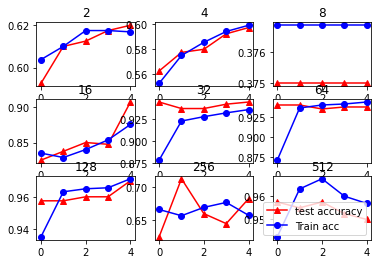

In [95]:


loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]
g=0
figure, axis = plt.subplots(3, 3)


 
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 
for i in [2 , 4 , 8 , 16 , 32 , 64,  128 , 256 , 512] :
  loss_test_per_fold=[]
  acc_test_per_fold=[]
  acc_per_fold=[]
  loss_per_fold=[]
  model1 = Sequential()
  model1.add(Dense(i, input_dim=24))
  model1.add(Dense(2))

  model1.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['acc'])
  model1.summary() 
  for train, test in kfold.split(X , Y): 
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
     
    
    # Fit data to model
    history = model1.fit(X_train, Y_train ,
                validation_data=(X_test , Y_test) ,       
                batch_size=10,
                epochs=5
                )
    acc= history.history['acc']
    loss=history.history['loss']
    val_acc=history.history['val_acc']
    val_loss=history.history['val_loss']
    scores = model.evaluate(X_test,Y_test )
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_test_per_fold.append(val_loss)
    acc_test_per_fold.append(val_acc)
    acc_per_fold.append(acc)
    loss_per_fold.append(loss)


    fold_no = fold_no + 1
  
  acc_test_per_fold= np.array(acc_test_per_fold)
  acc_test=np.sum(acc_test_per_fold , axis=0)/5
  axis[g//3 , g%3].plot(acc_test, 'r^-', label='test accuracy')
  axis[g//3 , g%3].set_title(f"{i}")
  plt.grid()
  plt.legend()

  acc_per_fold= np.array(acc_per_fold)
  acc=np.sum(acc_per_fold , axis=0)/5
  axis[g//3 , g%3].plot(acc, 'bo-', label='Train acc')
  axis[g//3 , g%3].set_title(f"{i}")
  plt.grid()
  plt.legend()  

  g=g+1

Model: "sequential_167"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_359 (Dense)           (None, 40)                1000      
                                                                 
 dense_360 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 1.0700 - acc: 0.6687 - val_loss: 0.4674 - val_acc: 0.7500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.4897 - acc: 0.7906 - val_loss: 0.2975 - val_acc: 0.9250
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3641 - acc: 0.9156

Score for fold 5: loss of 0.7853571772575378; acc of 52.49999761581421%
Model: "sequential_168"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_361 (Dense)           (None, 40)                1000      
                                                                 
 dense_362 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 1.4629 - acc: 0.6906 - val_loss: 0.5833 - val_acc: 0.6500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.5270 - acc: 0.8469 - val_loss: 0.5038 - val_acc: 0.9000
Epoch 3/5
32/32 [==

Score for fold 10: loss of 0.6313971281051636; acc of 58.74999761581421%


Model: "sequential_169"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_363 (Dense)           (None, 40)                1000      
                                                                 
 dense_364 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 11 ...
Epoch 1/5
32/32 [==============================] - 1s 8ms/step - loss: 0.6583 - acc: 0.7031 - val_loss: 0.4409 - val_acc: 0.8750
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3958 - acc: 0.9094 - val_loss: 0.3429 - val_acc: 0.9375
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.3015 - acc: 0.931

Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_365 (Dense)           (None, 40)                1000      
                                                                 
 dense_366 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 16 ...
Epoch 1/5
32/32 [==============================] - 1s 7ms/step - loss: 0.6670 - acc: 0.6438 - val_loss: 0.6878 - val_acc: 0.5500
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6353 - acc: 0.6438 - val_loss: 0.6671 - val_acc: 0.5500
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6088 - acc: 0.643

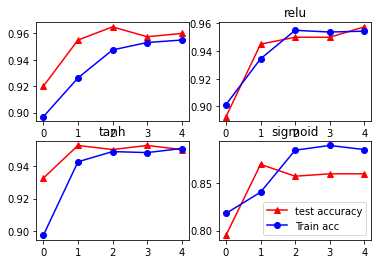

In [101]:


loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]
g=0
figure, axis = plt.subplots(2,2)


 
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 
for i in ['' ,'relu', 'tanh' , 'sigmoid' ] :
  loss_test_per_fold=[]
  acc_test_per_fold=[]
  acc_per_fold=[]
  loss_per_fold=[]
  if i=='':
    model1= Sequential()
    model1.add(Dense(40 , input_dim=24))
    model1.add(Dense(2))
  if i!= '':  
    model1 = Sequential()
    model1.add(Dense(40,  activation=i , input_dim=24))
    model1.add(Dense(2, activation=i) )

  model1.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['acc'])
  model1.summary() 
  for train, test in kfold.split(X , Y): 
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
     
    
    # Fit data to model
    history = model1.fit(X_train, Y_train ,
                validation_data=(X_test , Y_test) ,       
                batch_size=10,
                epochs=5
                )
    acc= history.history['acc']
    loss=history.history['loss']
    val_acc=history.history['val_acc']
    val_loss=history.history['val_loss']
    scores = model.evaluate(X_test,Y_test )
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_test_per_fold.append(val_loss)
    acc_test_per_fold.append(val_acc)
    acc_per_fold.append(acc)
    loss_per_fold.append(loss)


    fold_no = fold_no + 1
  
  acc_test_per_fold= np.array(acc_test_per_fold)
  acc_test=np.sum(acc_test_per_fold , axis=0)/5
  axis[g//2 , g%2].plot(acc_test, 'r^-', label='test accuracy')
  axis[g//2 , g%2].set_title(f"{i}")
  plt.grid()
  plt.legend()

  acc_per_fold= np.array(acc_per_fold)
  acc=np.sum(acc_per_fold , axis=0)/5
  axis[g//2 , g%2].plot(acc, 'bo-', label='Train acc')
  axis[g//2 , g%2].set_title(f"{i}")
  plt.grid()
  plt.legend()  

  g=g+1

Model: "sequential_174"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_373 (Dense)           (None, 40)                1000      
                                                                 
 dense_374 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/5
80/80 [==============================] - 1s 4ms/step - loss: 3.2259 - acc: 0.5375 - val_loss: 0.7743 - val_acc: 0.7500
Epoch 2/5
80/80 [==============================] - 0s 2ms/step - loss: 0.5028 - acc: 0.8938 - val_loss: 0.4539 - val_acc: 0.8875
Epoch 3/5
80/80 [==============================] - 0s 2ms/step - loss: 0.3339 - acc: 0.9438

Score for fold 5: loss of 0.671871542930603; acc of 66.25000238418579%
Model: "sequential_175"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_375 (Dense)           (None, 40)                1000      
                                                                 
 dense_376 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 6 ...
Epoch 1/5
10/10 [==============================] - 1s 22ms/step - loss: 0.9738 - acc: 0.3562 - val_loss: 0.7220 - val_acc: 0.5625
Epoch 2/5
10/10 [==============================] - 0s 6ms/step - loss: 0.6823 - acc: 0.5312 - val_loss: 0.6023 - val_acc: 0.6250
Epoch 3/5
10/10 [==

Score for fold 10: loss of 0.7525561451911926; acc of 61.250001192092896%


Model: "sequential_176"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_377 (Dense)           (None, 40)                1000      
                                                                 
 dense_378 (Dense)           (None, 2)                 82        
                                                                 
Total params: 1,082
Trainable params: 1,082
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 11 ...
Epoch 1/5
5/5 [==============================] - 1s 49ms/step - loss: 1.7150 - acc: 0.4812 - val_loss: 1.0962 - val_acc: 0.5375
Epoch 2/5
5/5 [==============================] - 0s 8ms/step - loss: 0.9931 - acc: 0.3938 - val_loss: 0.8928 - val_acc: 0.3500
Epoch 3/5
5/5 [==============================] - 0s 8ms/step - loss: 0.7770 - acc: 0.3906 - v

Score for fold 15: loss of 0.5744169354438782; acc of 60.00000238418579%


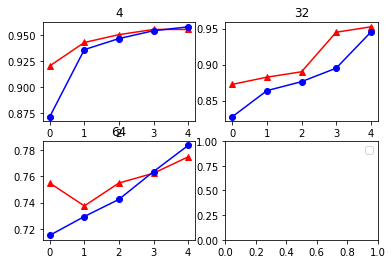

In [103]:


loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]
g=0
figure, axis = plt.subplots(2,2)


 
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 
for i in [4 ,  32 , 64] :
  loss_test_per_fold=[]
  acc_test_per_fold=[]
  acc_per_fold=[]
  loss_per_fold=[]

  model1 = Sequential()
  model1.add(Dense(40,  activation="relu" , input_dim=24))
  model1.add(Dense(2))

  model1.compile(optimizer='adam',
          loss='binary_crossentropy',
          metrics=['acc'])
  model1.summary() 
  for train, test in kfold.split(X , Y): 
    X_train, X_test = X.iloc[train], X.iloc[test]
    Y_train, Y_test = Y.iloc[train], Y.iloc[test]
    Y_train = to_categorical(Y_train)
    Y_test = to_categorical(Y_test)
    #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
    print('------------------------------------------------------------------------')
    print(f'Training for fold {fold_no} ...')
    
     
    
    # Fit data to model
    history = model1.fit(X_train, Y_train ,
                validation_data=(X_test , Y_test) ,       
                batch_size=i,
                epochs=5
                )
    acc= history.history['acc']
    loss=history.history['loss']
    val_acc=history.history['val_acc']
    val_loss=history.history['val_loss']
    scores = model.evaluate(X_test,Y_test )
    print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
    loss_test_per_fold.append(val_loss)
    acc_test_per_fold.append(val_acc)
    acc_per_fold.append(acc)
    loss_per_fold.append(loss)


    fold_no = fold_no + 1
  
  acc_test_per_fold= np.array(acc_test_per_fold)
  acc_test=np.sum(acc_test_per_fold , axis=0)/5
  axis[g//2 , g%2].plot(acc_test, 'r^-', label='test accuracy')
  axis[g//2 , g%2].set_title(f"{i}")
  plt.grid()
  plt.legend()

  acc_per_fold= np.array(acc_per_fold)
  acc=np.sum(acc_per_fold , axis=0)/5
  axis[g//2 , g%2].plot(acc, 'bo-', label='Train acc')
  axis[g//2 , g%2].set_title(f"{i}")
  plt.grid()
  plt.legend()  

  g=g+1

Model: "sequential_208"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_493 (Dense)           (None, 32)                800       
                                                                 
 dense_494 (Dense)           (None, 64)                2112      
                                                                 
 dense_495 (Dense)           (None, 32)                2080      
                                                                 
 dense_496 (Dense)           (None, 2)                 66        
                                                                 
Total params: 5,058
Trainable params: 5,058
Non-trainable params: 0
_________________________________________________________________
------------------------------------------------------------------------
Training for fold 1 ...
Epoch 1/10
32/32 [==============================] - 1s 9ms/step - loss: 0.6043 - acc:

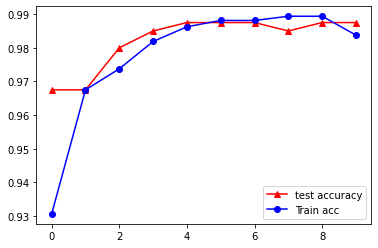

In [142]:


loss_test_per_fold=[]
acc_test_per_fold=[]
acc_per_fold=[]
loss_per_fold=[]




 
fold_no = 1
X = (X - X.min()) / (X.max() - X.min()) 


model1 = Sequential()
model1.add(Dense(32,  activation="relu" , input_dim=24))
model1.add(Dense(64,  activation="relu" ))
model1.add(Dense(32,  activation="relu" ))
model1.add(Dense(2))

model1.compile(optimizer='adam',
        loss='binary_crossentropy',
        metrics=['acc'])
model1.summary() 
for train, test in kfold.split(X , Y): 
  X_train, X_test = X.iloc[train], X.iloc[test]
  Y_train, Y_test = Y.iloc[train], Y.iloc[test]
  Y_train = to_categorical(Y_train)
  Y_test = to_categorical(Y_test)
  #print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)
  print('------------------------------------------------------------------------')
  print(f'Training for fold {fold_no} ...')
  
    
  
  # Fit data to model
  history = model1.fit(X_train, Y_train ,
              validation_data=(X_test , Y_test) ,       
              batch_size=10,
              epochs=10
              )
  acc= history.history['acc']
  loss=history.history['loss']
  val_acc=history.history['val_acc']
  val_loss=history.history['val_loss']
  #scores = model.evaluate(X_test,Y_test )
  #print(f'Score for fold {fold_no}: {model.metrics_names[0]} of {scores[0]}; {model.metrics_names[1]} of {scores[1]*100}%')
  loss_test_per_fold.append(val_loss)
  acc_test_per_fold.append(val_acc)
  acc_per_fold.append(acc)
  loss_per_fold.append(loss)


  fold_no = fold_no + 1


acc_test_per_fold= np.array(acc_test_per_fold)
acc_test=np.sum(acc_test_per_fold , axis=0)/5
plt.plot(acc_test, 'r^-', label='test accuracy')

plt.grid()
plt.legend()

acc_per_fold= np.array(acc_per_fold)
acc=np.sum(acc_per_fold , axis=0)/5

plt.plot(acc, 'bo-', label='Train acc')

plt.grid()
plt.legend()  
print(f'accuracy test ==>{acc_test[-1]*100} %')
#print(f'accuracy  ==>{acc[-1]*100} %')